# **Ensemble Learning** 
* A Supervised Learning approach.
* Uses group of classifiers/regressors for classification.
* The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
* Two families of ensemble methods:
 
 **averaging methods**- the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.
Examples: Bagging methods, Forests of randomized trees.

 **boosting methods**- base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.
Examples: AdaBoost, Gradient Tree Boosting.





### **Ensemble learning Types:**


1.   **Bootstrap Aggregating or Bagging:** 
     * Bootstrap sampling is sampling with replacements means training samples get replaced with whole dataset before you draw another samples.
     *Combine predictions by averaging the output (regreesion).
     *Combine predictions by voting (classfication).
     * can be applied to many classifiers such as ANN, CART etc.

**Bagging methods come in many flavours but mostly differ from each other by the way they draw random subsets of the training set:**

> When samples are drawn with replacement, then the method is known as **Bagging**.

>When random subsets of the dataset are drawn as random subsets of the samples (samples are drawn without replacement),then this algorithm is known as **Pasting**.

>When random subsets of the dataset are drawn as random subsets of the features, then the method is known as **Random Subspaces**.

>Finally, when base estimators are built on subsets of both samples and features, then the method is known as **Random Patches**.

2.  **Boosting:**
    * Train weak classifiers.
    * Add them to a final strong classifier by weighting (weighted by accuracy).
    * Once added, the data are reweighted. In which analysis is performed by following terms-
         * Misclassified samples gained weight.
         * Correctly classified samples lose weight.
         * Algo are forced to learn more from misclassified samples.

2.  **Stacking:**
    * Also known as stacked generalization.
    * combine information from multiple predictive model to generate new model.
    * sometimes stacking (also known as 2nd level model) will outperform each of individual model due to its smoothing nature and ability to highlight base model where it performs best and discredit each basemodel where it performs poorly.
    * Thats why stacking is very effective when there is different types of base models.
    * steps used by stacking:

         1. Train the learning algo.
         2. Train combiner algo by using the predictions from step 1.
        
         





### **Other Ensemble methods:**  [learn by Google search]

*   Bayes optimal classifier
*   Bayesian Parameter Averaging
*   Baysian Model Combination
*   Bucket of  models



## **Bagging:**

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sns.set_style('whitegrid')

In [4]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)
import sys
print(sys.version)

1.18.5
1.0.5
3.2.2
0.10.1
0.22.2.post1
3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [5]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.shape

(891, 15)

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

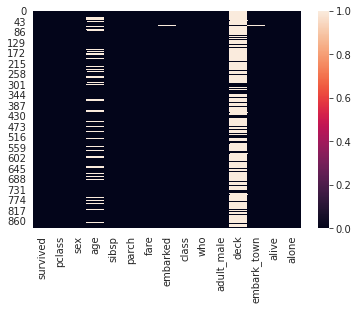

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['age'] = df['age'].fillna(df['age'].mean()) # we remove all the null values of 'age' into mean of 'age'.

In [10]:
df.shape # very less after removing null values ...not good for practical purpose.

(891, 15)

In [11]:
df = df.drop(['deck'],axis = 1) # remove 'deck' feature as it contains multiple null values.
df.shape

(891, 14)

In [12]:
df.dropna(inplace=True) # will remove remainng 4 null values by droping complete row. size reduced but not affect much in model proecessing.
df.shape

(889, 14)

In [13]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

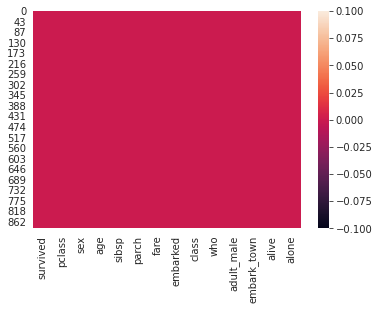

In [14]:
sns.heatmap(df.isnull())


In [15]:
df['pclass'].unique()

array([3, 1, 2])

In [16]:
df['pclass'].value_counts()

3    491
1    214
2    184
Name: pclass, dtype: int64

In [17]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
df['sex'].value_counts()

male      577
female    312
Name: sex, dtype: int64

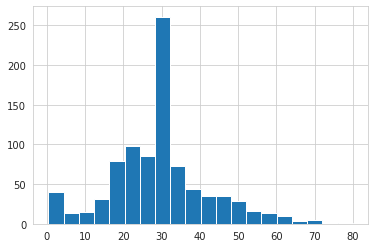

In [19]:
df['age'].hist(bins = 20)

### **Data Preprocessing:**

In [20]:
x = df[['pclass','sex','age']].copy()

In [21]:
x.head()

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [23]:
x['sex'] = le.fit_transform(x['sex'])
x.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [24]:
x.shape

(889, 3)

In [25]:
x.describe()

,pclass,sex,age
count,889.000000,889.000000,889.000000
mean,2.311586,0.649044,29.653446
std,0.834700,0.477538,12.968366
min,1.000000,0.000000,0.420000
25%,2.000000,0.000000,22.000000
50%,3.000000,1.000000,29.699118
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  889 non-null    int64  
 1   sex     889 non-null    int64  
 2   age     889 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 27.8 KB


In [27]:
y = df['survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [28]:
y.value_counts()

0    549
1    340
Name: survived, dtype: int64

### **Model Fitting:[Bagging with Decision Tree]**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [32]:
def print_score(model,x_train,y_train,x_test,y_test,part):
  lb = LabelBinarizer()
  lb.fit(y_train)
  if part == 'train':
    y_pred = model.predict(x_train)
    print("Training Performance:\n\n")
    print("Accuracy:{0:.4f}\n".format(accuracy_score(y_train,y_pred)))
    print("Clasification Report:\n{}\n".format(classification_report(y_train,y_pred)))
    print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,y_pred)))
    print("ROC_AUC_Score:{0:.4f}\n".format(roc_auc_score(y_train,y_pred)))
    res = cross_val_score(model,x_train,y_train,cv = 10,scoring='accuracy')
    print("Average accuracy:\t{0:.4f}".format(np.mean(res)))
    print("Average std:\t\t{0:.4f}".format(np.std(res)))
  elif part == 'test':
    y_pred = model.predict(x_test)
    print("Testing Performance:\n\n")
    print("Accuracy:{0:.4f}\n".format(accuracy_score(y_test,y_pred)))
    print("Clasification Report:\n{}\n".format(classification_report(y_test,y_pred)))
    print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,y_pred)))
    print("ROC_AUC_Score:{0:.4f}\n".format(roc_auc_score(y_test,y_pred)))
    

In [33]:
# Decision TRee Classifier

clfTree = DecisionTreeClassifier()

In [34]:
clfTree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
print_score(clfTree,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clfTree,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.8810

Clasification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       382
           1       0.92      0.76      0.83       240

    accuracy                           0.88       622
   macro avg       0.89      0.86      0.87       622
weighted avg       0.88      0.88      0.88       622


Confusion Matrix:
[[365  17]
 [ 57 183]]

ROC_AUC_Score:0.8590

Average accuracy:	0.8022
Average std:		0.0293

***************************************************************

Testing Performance:


Accuracy:0.8165

Clasification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       167
           1       0.80      0.68      0.74       100

    accuracy                           0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267


Confusion Matrix:
[[150  17]
 [ 32  68]]

R

In [36]:
# Bagging (oob_score == False) Classifier

**Out-of-bag (OOB) error**, also called out-of-bag estimate, is a method of measuring the prediction error of random forests, boosted decision trees, and other machine learning models utilizing bootstrap aggregating (bagging) to sub-sample data samples used for training. OOB is the mean prediction error on each training sample xᵢ, using only the trees that did not have xᵢ in their bootstrap sample.

Subsampling allows one to define an out-of-bag estimate of the prediction performance improvement by evaluating predictions on those observations which were not used in the building of the next base learner.



In [37]:
clfbag = BaggingClassifier(base_estimator=clfTree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [38]:
clfbag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [39]:
print_score(clfbag,x_train,y_train,x_test,y_test,part = 'train')
print("\n*****************************************************************\n")
print_score(clfbag,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.8810

Clasification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       382
           1       0.87      0.82      0.84       240

    accuracy                           0.88       622
   macro avg       0.88      0.87      0.87       622
weighted avg       0.88      0.88      0.88       622


Confusion Matrix:
[[352  30]
 [ 44 196]]

ROC_AUC_Score:0.8691

Average accuracy:	0.8006
Average std:		0.0333

*****************************************************************

Testing Performance:


Accuracy:0.7978

Clasification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       167
           1       0.74      0.70      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267


Confusion Matrix:
[[143  24]
 [ 30  70]]


In [40]:
# Bagging (oob_score == True)
# gives generalization accuracy.

clfbag2 = BaggingClassifier(base_estimator=clfTree,n_estimators=1000,oob_score = True,bootstrap=True,n_jobs=-1,random_state=42)

In [41]:
clfbag2.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [42]:
clfbag2.oob_score_

0.7958199356913184

In [43]:
print_score(clfbag2,x_train,y_train,x_test,y_test,part = 'train')
print("\n*****************************************************************\n")
print_score(clfbag2,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.8810

Clasification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       382
           1       0.87      0.82      0.84       240

    accuracy                           0.88       622
   macro avg       0.88      0.87      0.87       622
weighted avg       0.88      0.88      0.88       622


Confusion Matrix:
[[352  30]
 [ 44 196]]

ROC_AUC_Score:0.8691

Average accuracy:	0.8006
Average std:		0.0333

*****************************************************************

Testing Performance:


Accuracy:0.7978

Clasification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       167
           1       0.74      0.70      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267


Confusion Matrix:
[[143  24]
 [ 30  70]]


### **Model Fitting:[Random Forest]**

* Ensemble of decision trees.
* trained via bagging method (repeated sampling with replacements).
   *   Bagging : sample from samples.
   * RF : sample from predictors. m = squrt(p) for classification and m = p/3 for regression.
   *utilize uncorrelated trees.
* RF : samples both observations and features of training data.
* Bagging: samples only observations at random. Decision tree select best feature when splitting a node. 




In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
x

,pclass,sex,age
0,3,1,22.000000
1,1,0,38.000000
2,3,0,26.000000
3,1,0,35.000000
4,3,1,35.000000
...,...,...,...
886,2,1,27.000000
887,1,0,19.000000
888,3,0,29.699118
889,1,1,26.000000


In [46]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=42)

In [48]:
clfRF = RandomForestClassifier(random_state=42,n_estimators=100)

In [49]:
clfRF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
print_score(clfRF,x_train,y_train,x_test,y_test,part = 'train')
print("\n*****************************************************************\n")
print_score(clfRF,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.8775

Clasification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       491
           1       0.89      0.78      0.83       309

    accuracy                           0.88       800
   macro avg       0.88      0.86      0.87       800
weighted avg       0.88      0.88      0.88       800


Confusion Matrix:
[[462  29]
 [ 69 240]]

ROC_AUC_Score:0.8588

Average accuracy:	0.8088
Average std:		0.0268

*****************************************************************

Testing Performance:


Accuracy:0.8315

Clasification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        58
           1       0.77      0.74      0.75        31

    accuracy                           0.83        89
   macro avg       0.82      0.81      0.81        89
weighted avg       0.83      0.83      0.83        89


Confusion Matrix:
[[51  7]
 [ 8 23]]

ROC

### **Using GridSearchCV:**

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
rfModel = RandomForestClassifier(random_state=42)

In [53]:
params = {
    'max_depth':[3,None],
    'min_samples_split':[2,3,10],
    'min_samples_leaf':[1,3,10],
    'bootstrap':[True,False],
    'criterion':['gini','entropy']
}

In [54]:
grid_search = GridSearchCV(rfModel,params,scoring = 'accuracy',n_jobs = -1,iid = False,cv = 5,verbose = 1)

In [55]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   43.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [56]:
grid_search.best_score_

0.8075000000000001

In [57]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [58]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [59]:
print_score(grid_search,x_train,y_train,x_test,y_test,part = 'train')
print("\n*****************************************************************\n")
print_score(grid_search,x_train,y_train,x_test,y_test,part = 'test')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Training Performance:


Accuracy:0.8075

Clasification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       491
           1       0.94      0.54      0.68       309

    accuracy                           0.81       800
   macro avg       0.85      0.76      0.77       800
weighted avg       0.84      0.81      0.79       800


Confusion Matrix:
[[480  11]
 [143 166]]

ROC_AUC_Score:0.7574

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.9s


Average accuracy:	0.7888
Average std:		0.0356

*****************************************************************

Testing Performance:


Accuracy:0.8202

Clasification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        58
           1       0.86      0.58      0.69        31

    accuracy                           0.82        89
   macro avg       0.83      0.76      0.78        89
weighted avg       0.83      0.82      0.81        89


Confusion Matrix:
[[55  3]
 [13 18]]

ROC_AUC_Score:0.7645



[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


### **Extra-Trees(Extremely Randomized Trees) Classifier:**

In extremely randomized trees (ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. 

As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.

Imp Points:
1.RF is based on Decision Trees.
2.Decision Tree node splitting is based on gini or entropy criteria.
3.Extra Trees make use of random thresholds for each feature unlike decision tree.

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
clfExtree = ExtraTreesClassifier(random_state=42,n_estimators = 100)

In [62]:
clfExtree.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [63]:
print_score(clfExtree,x_train,y_train,x_test,y_test,part = 'train')
print("\n*****************************************************************\n")
print_score(clfExtree,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.8775

Clasification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       491
           1       0.90      0.76      0.83       309

    accuracy                           0.88       800
   macro avg       0.88      0.86      0.87       800
weighted avg       0.88      0.88      0.88       800


Confusion Matrix:
[[466  25]
 [ 73 236]]

ROC_AUC_Score:0.8564

Average accuracy:	0.8063
Average std:		0.0307

*****************************************************************

Testing Performance:


Accuracy:0.8427

Clasification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        58
           1       0.81      0.71      0.76        31

    accuracy                           0.84        89
   macro avg       0.83      0.81      0.82        89
weighted avg       0.84      0.84      0.84        89


Confusion Matrix:
[[53  5]
 [ 9 22]]

ROC

## **Boosting(Hypothesis Boosting):**
Combine multiple weak learners into strong learners.
Train predictors sequentially.

### **AdaBoost/Adaptive Boosting:**
* It learns from past mistake , focuses mainly on difficult problems which did not get right in prior learning.
* It pays more attention to training instances that are under fitted previously.
*The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 
* The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. 
* The data modifications at each so-called boosting iteration consist of applying weights w1,w2,....,wn to each of the training samples. 
* Initially, those weights are all set to wi = 1/N, so that the first step simply trains a weak learner on the original data.
* For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data.
* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly.
* As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

#### *AdaBoost can be used both for classification and regression problems:*
> For multi-class classification, AdaBoostClassifier implements AdaBoost-SAMME and AdaBoost-SAMME.R

> For regression, AdaBoostRegressor implements AdaBoost.R2 

*SAMME.R ---> Stagewise Additive Modelling using a Multiclass Exponential loss function;*
*R ---> Real*

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
x.shape

(889, 3)

In [66]:
y.shape

(889,)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [68]:
clfada = AdaBoostClassifier(n_estimators=100,random_state=42)

In [69]:
clfada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [70]:
print_score(clfada,x_train,y_train,x_test,y_test,part = 'train')
print("\n*****************************************************************\n")
print_score(clfada,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.8055

Clasification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       382
           1       0.73      0.80      0.76       240

    accuracy                           0.81       622
   macro avg       0.79      0.80      0.80       622
weighted avg       0.81      0.81      0.81       622


Confusion Matrix:
[[310  72]
 [ 49 191]]

ROC_AUC_Score:0.8037

Average accuracy:	0.7701
Average std:		0.0500

*****************************************************************

Testing Performance:


Accuracy:0.7978

Clasification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       167
           1       0.70      0.81      0.75       100

    accuracy                           0.80       267
   macro avg       0.79      0.80      0.79       267
weighted avg       0.81      0.80      0.80       267


Confusion Matrix:
[[132  35]
 [ 19  81]]


### **AdaBoost with Random Forest Classifier:**

In [71]:
clfadarf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100),n_estimators=100)

In [72]:
clfadarf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [73]:
print_score(clfadarf,x_train,y_train,x_test,y_test,part = 'train')
print("\n*****************************************************************\n")
print_score(clfadarf,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.8810

Clasification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       382
           1       0.86      0.82      0.84       240

    accuracy                           0.88       622
   macro avg       0.88      0.87      0.87       622
weighted avg       0.88      0.88      0.88       622


Confusion Matrix:
[[351  31]
 [ 43 197]]

ROC_AUC_Score:0.8698

Average accuracy:	0.7974
Average std:		0.0233

*****************************************************************

Testing Performance:


Accuracy:0.8015

Clasification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       167
           1       0.76      0.69      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267


Confusion Matrix:
[[145  22]
 [ 31  69]]


### **Gradient Boosting / Gradient Boosting Machine:**

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. 


*   Seqentially adding predictors.
*   Each one correcting its predecessor.
*   Fit new predictors to the residual errors.

Compare this to adaboost:

* Alter instance weights at every iteration.

> $Y = F(x) + \epsilon $

>$\epsilon = G(x) + \epsilon_{1} $

>so, $Y = F(x) + G(x) + \epsilon_{1} $

>$\epsilon_{1} = H(x) + \epsilon_{2} $

> $Y = F(x) + G(x) + H(x)+ \epsilon_{2} $

finally , by adding weighting,
 
> $Y = \alpha F(x) + \beta G(x) + \gamma H(x)+ \epsilon_{3} $

 Gradient Boosting have 3 elements:

 >Loss fn to be optimized.

 >Weak learner to make predictions.

 >Additve model to add weak learners to minimize the loss fn.


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
clfgb = GradientBoostingClassifier()

In [76]:
clfgb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
print_score(clfgb,x_train,y_train,x_test,y_test,part = 'train')
print("\n*****************************************************************\n")
print_score(clfgb,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.8585

Clasification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       382
           1       0.85      0.77      0.81       240

    accuracy                           0.86       622
   macro avg       0.86      0.84      0.85       622
weighted avg       0.86      0.86      0.86       622


Confusion Matrix:
[[349  33]
 [ 55 185]]

ROC_AUC_Score:0.8422

Average accuracy:	0.7958
Average std:		0.0485

*****************************************************************

Testing Performance:


Accuracy:0.8127

Clasification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       167
           1       0.77      0.72      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267


Confusion Matrix:
[[145  22]
 [ 28  72]]


## **XGBoost:**

an open-source software library which provides a gradient boosting framework for C++, Java, Python, R, Julia, Perl, and Scala. It works on Linux, Windows, and macOS. From the project description, it aims to provide a "Scalable, Portable and Distributed Gradient Boosting Library".

**XG Boost : Extreme Gradient Boosting**

A supervised ML algo. Having objective fn = training loss+Regularization

>training loss measures hoe predictive our model is on training data.

for Regression, MSE and for classification , Logarithmic.

>Regularization term controls the complexity of model, avoid overfittig.

XG Boost uses more regularized model , also called as regularized gradient boosting.



........................................................................................................................................................................................................................


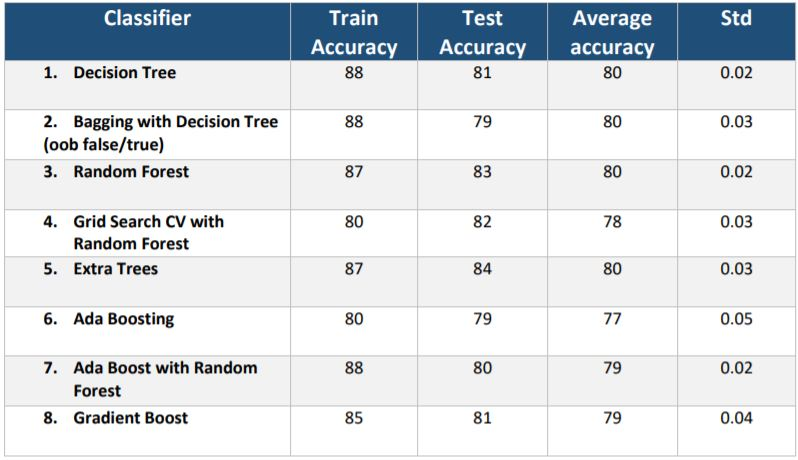